### Final Project - ML in Python 
By Yeva Kramrova and John Little

### I. - Introduction
Who doesn’t love a good night’s sleep? It’s that magical time when your body recharges, your brain sorts through the chaos of the day, and you wake up feeling ready to take on the world. But what happens when sleep doesn’t go as planned? Studying sleep lets us uncover its mysteries and figure out how to make those precious hours count. Let’s dive in and see what makes sleep so essential—and so fascinating!

##### Key Features of the Dataset:
Comprehensive Sleep Metrics: Explore sleep duration, quality, and factors influencing sleep patterns.
Lifestyle Factors: Analyze physical activity levels, stress levels, and BMI categories.
Cardiovascular Health: Examine blood pressure and heart rate measurements.
Sleep Disorder Analysis: Identify the occurrence of sleep disorders such as Insomnia and Sleep Apnea.

##### Dataset Columns
Person ID: An identifier for each individual.

Gender: The gender of the person (Male/Female).

Age: The age of the person in years.

Occupation: The occupation or profession of the person.

Sleep Duration (hours): The number of hours the person sleeps per day.

Quality of Sleep (scale: 1-10): A subjective rating of the quality of sleep, ranging from 1 to 10.

Physical Activity Level (minutes/day): The number of minutes the person engages in physical activity daily.

Stress Level (scale: 1-10): A subjective rating of the stress level experienced by the person, ranging from 1 to 10.

BMI Category: The BMI category of the person (e.g., Underweight, Normal, Overweight).

Blood Pressure (systolic/diastolic): The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.

Heart Rate (bpm): The resting heart rate of the person in beats per minute.

Daily Steps: The number of steps the person takes per day.

Sleep Disorder: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).


### II. Dataset Description
The Sleep Health and Lifestyle Dataset comprises 400 rows and 13 columns, covering a wide range of variables related to sleep and daily habits. It includes details such as gender, age, occupation, sleep duration, quality of sleep, physical activity level, stress levels, BMI category, blood pressure, heart rate, daily steps, and the presence or absence of sleep disorders.

In [55]:
## import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

#### Step.1 - Sample of the dataset

In [29]:
## read file
data = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


#### Step 2 - Determining the data type

In [32]:
## check count of each column and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


#### Step 3 - Determining the missing values and its percentage

In [33]:
## check for missing data
missing_data_percent=round((data.isnull().sum() / len(data))*100,2)
missing_data_percent

Person ID                   0.00
Gender                      0.00
Age                         0.00
Occupation                  0.00
Sleep Duration              0.00
Quality of Sleep            0.00
Physical Activity Level     0.00
Stress Level                0.00
BMI Category                0.00
Blood Pressure              0.00
Heart Rate                  0.00
Daily Steps                 0.00
Sleep Disorder             58.56
dtype: float64

#### Step 4 - Replacing Missing Values
At first it seems like there is 58.56% of missing values in Sleep DIsorder Column. However, if we take a closer look into the column data, it says "NaN", whereas in reality it means that a person has no Sleep Disorder. Therefore, the following code imputes "No Disorder" into the values that the Python considers missing ("NaN".)

In [34]:
## use imputation dictionary to replace missing sleep disorders with "no disorder"
imputation_dict={"Sleep Disorder": "No Disorder"}
data2=data.fillna(value=imputation_dict)

Now, data has no missing values.

In [35]:
## check that missing data correction worked properly
data2.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [36]:
## show first 5 rows of dataset
data2.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Disorder
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


### III. Data Set Summary Statistics
This section will dive deeper into the statistical measurements of the dataset such as count, mean, standard deviation, min, 25th, 50th, 75th, max. Also, the section will show the proportions for each categorical variable, as well as the correlation table and matrix to show the correlation between the continuous variables.

#### Step 1 - Showing important statistical measurements of the dataset

In [37]:
## summary statistics of the numerical variables
data2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Person ID,374.0,187.500000,108.108742,1.0,94.25,187.5,280.75,374.0
Age,374.0,42.184492,8.673133,27.0,35.25,43.0,50.00,59.0
Sleep Duration,374.0,7.132086,0.795657,5.8,6.40,7.2,7.80,8.5
Quality of Sleep,374.0,7.312834,1.196956,4.0,6.00,7.0,8.00,9.0
Physical Activity Level,374.0,59.171123,20.830804,30.0,45.00,60.0,75.00,90.0
Stress Level,374.0,5.385027,1.774526,3.0,4.00,5.0,7.00,8.0
Heart Rate,374.0,70.165775,4.135676,65.0,68.00,70.0,72.00,86.0
Daily Steps,374.0,6816.844920,1617.915679,3000.0,5600.00,7000.0,8000.00,10000.0


#### Step 2 - Getting the frequency of each category and calculating proportion for each category. 

In [38]:
## find frequency and proportion of each categorical variable
categorical_columns = ['BMI Category', 'Blood Pressure', 'Gender', 'Occupation', 'Sleep Disorder']
for column in categorical_columns:
    print(f"--- {column} ---")
    
    frequency = data2[column].value_counts()
    
    proportion = data2[column].value_counts(normalize=True) * 100
    
    result_df = pd.DataFrame({'Frequency': frequency, 'Proportion (%)': proportion})
    
    print(result_df)
    print("\n")

--- BMI Category ---
               Frequency  Proportion (%)
BMI Category                            
Normal               195       52.139037
Overweight           148       39.572193
Normal Weight         21        5.614973
Obese                 10        2.673797


--- Blood Pressure ---
                Frequency  Proportion (%)
Blood Pressure                           
130/85                 99       26.470588
140/95                 65       17.379679
125/80                 65       17.379679
120/80                 45       12.032086
115/75                 32        8.556150
135/90                 27        7.219251
140/90                  4        1.069519
125/82                  4        1.069519
132/87                  3        0.802139
128/85                  3        0.802139
126/83                  2        0.534759
115/78                  2        0.534759
139/91                  2        0.534759
142/92                  2        0.534759
119/77                  2        0.5


#### Step 3 - Displaying the correlation table show the correlation between the continuous variables.

In [40]:
## separate numerical data
data_num=data2.select_dtypes('number')
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Age                      374 non-null    int64  
 2   Sleep Duration           374 non-null    float64
 3   Quality of Sleep         374 non-null    int64  
 4   Physical Activity Level  374 non-null    int64  
 5   Stress Level             374 non-null    int64  
 6   Heart Rate               374 non-null    int64  
 7   Daily Steps              374 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 23.5 KB


In [41]:
## create correlation matrix
data_num.corr()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
Person ID,1.000000,0.990516,0.296305,0.431612,0.149882,-0.394287,-0.225467,0.043844
Age,0.990516,1.000000,0.344709,0.473734,0.178993,-0.422344,-0.225606,0.057973
Sleep Duration,0.296305,0.344709,1.000000,0.883213,0.212360,-0.811023,-0.516455,-0.039533
Quality of Sleep,0.431612,0.473734,0.883213,1.000000,0.192896,-0.898752,-0.659865,0.016791
Physical Activity Level,0.149882,0.178993,0.212360,0.192896,1.000000,-0.034134,0.136971,0.772723
Stress Level,-0.394287,-0.422344,-0.811023,-0.898752,-0.034134,1.000000,0.670026,0.186829
Heart Rate,-0.225467,-0.225606,-0.516455,-0.659865,0.136971,0.670026,1.000000,-0.030309
Daily Steps,0.043844,0.057973,-0.039533,0.016791,0.772723,0.186829,-0.030309,1.000000


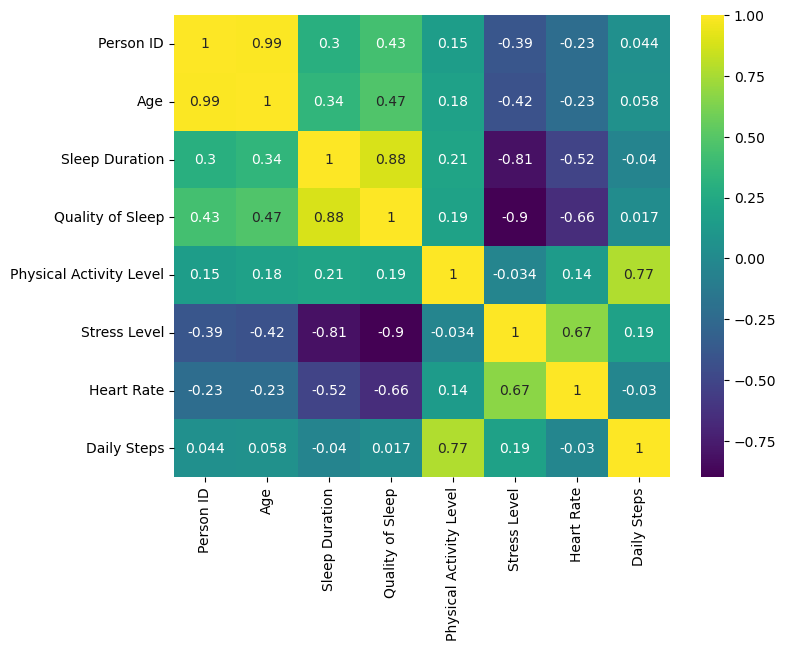

In [42]:
## use correlation matrix to create heatmap
corr_matrix=data2[['Person ID','Age','Sleep Duration','Quality of Sleep','Physical Activity Level','Stress Level','Heart Rate','Daily Steps']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='viridis')
plt.show()

### IV. Data Set Graphical Exploration

Graphical visualization helps to better identify trends, make comparisons, and recognize patterns in the numerical data. Therefore, in this section, different kinds of graphs will help us to become more familiar with the dataset discuss interesting distributions, anomalies, or imbalances of the dataset.

### UNIVARIATE PLOTS:

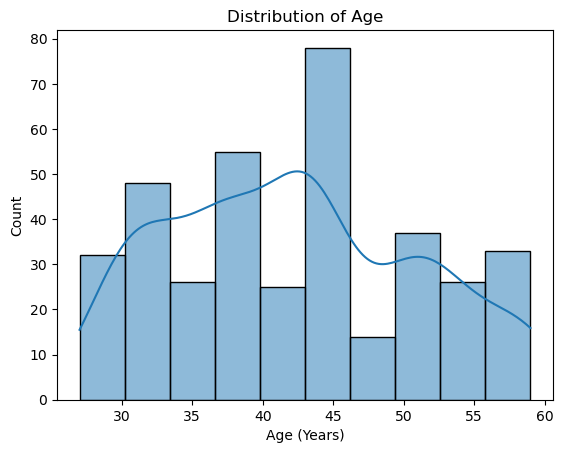

In [15]:
## histogram of age distribution
sns.histplot(data2['Age'], kde=True)
plt.xlabel('Age (Years)')
plt.title('Distribution of Age')
plt.show()


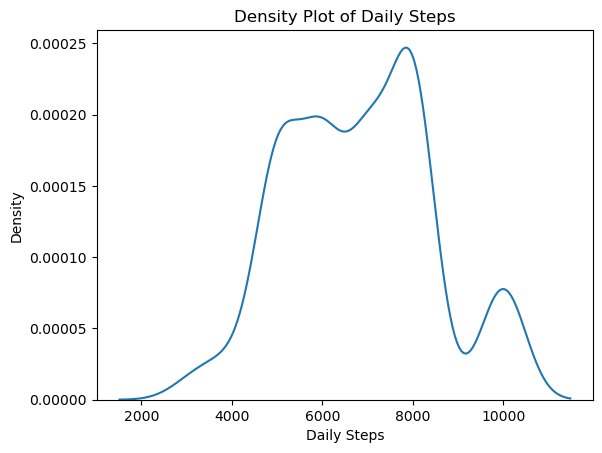

In [16]:
## density plot of Daily Steps
sns.kdeplot(data2['Daily Steps'])
plt.title('Density Plot of Daily Steps')
plt.xlabel('Daily Steps')
plt.ylabel('Density')
plt.show()

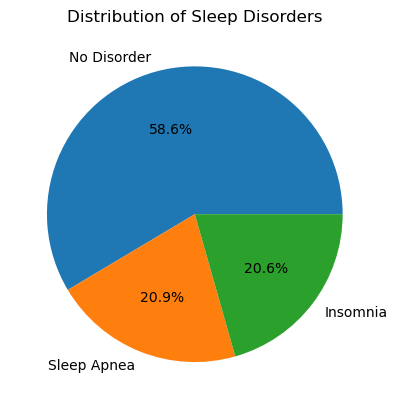

In [17]:
## pie chart of sleep disorder distribution
sleep_disorder_counts = data2['Sleep Disorder'].value_counts()
plt.pie(sleep_disorder_counts, labels=sleep_disorder_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Sleep Disorders')
plt.show()

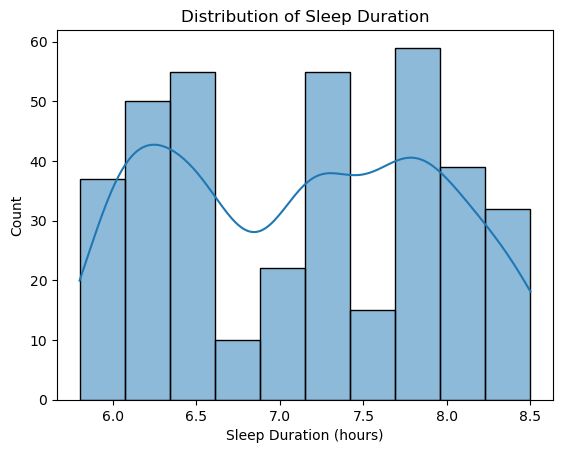

In [18]:
## histogram of sleep duration distribution
sns.histplot(data2['Sleep Duration'], kde=True)
plt.title('Distribution of Sleep Duration')
plt.xlabel('Sleep Duration (hours)')
plt.show()

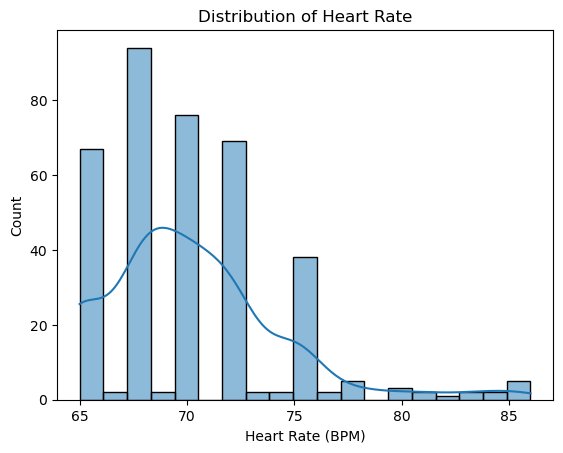

In [19]:
## Histogram of heart rate distribution
sns.histplot(data2['Heart Rate'], kde=True)
plt.title('Distribution of Heart Rate')
plt.xlabel('Heart Rate (BPM)')
plt.show()


### BIVARIATE PLOTS

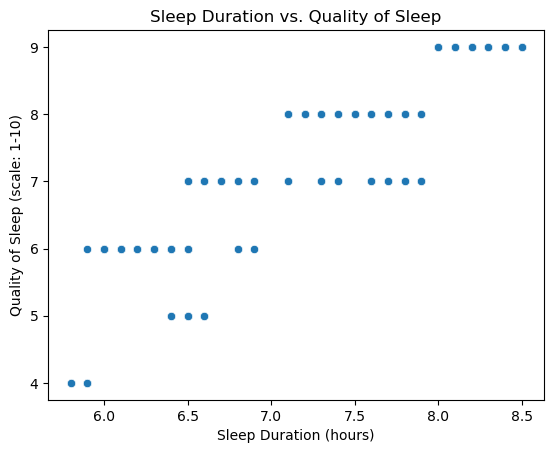

In [20]:
## scatterplot of sleep duration and quality
sns.scatterplot(x='Sleep Duration', y='Quality of Sleep', data=data2)
plt.title('Sleep Duration vs. Quality of Sleep')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Quality of Sleep (scale: 1-10)')
plt.show()

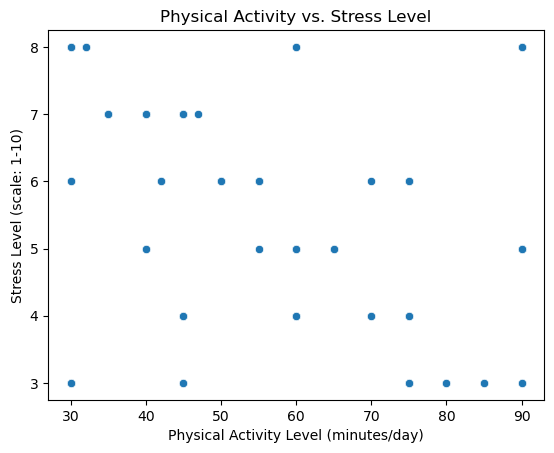

In [21]:
## scatterplot of physcial activity and stress levels
sns.scatterplot(x='Physical Activity Level', y='Stress Level', data=data2)
plt.title('Physical Activity vs. Stress Level')
plt.xlabel('Physical Activity Level (minutes/day)')
plt.ylabel('Stress Level (scale: 1-10)')
plt.show()

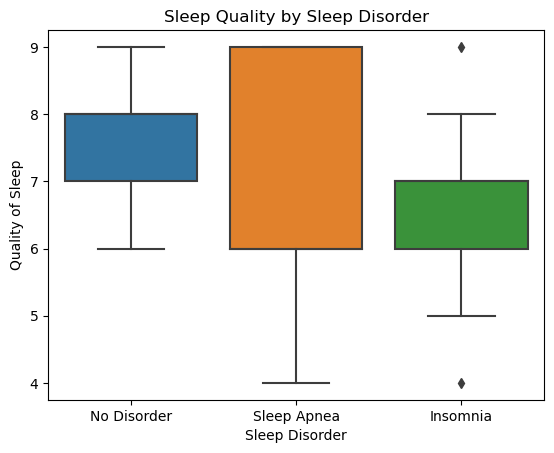

In [22]:
## boxplot of average quality of sleep by sleep disorder
sns.boxplot(x='Sleep Disorder', y='Quality of Sleep', data=data2)
plt.title('Sleep Quality by Sleep Disorder')
plt.show()

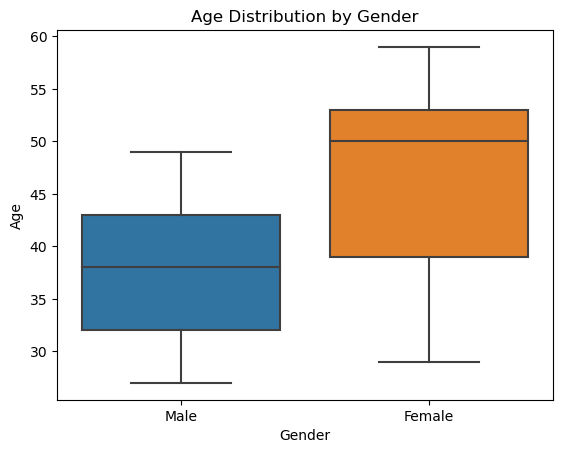

In [23]:
## boxplot of age distribution by gender
sns.boxplot(x='Gender', y='Age', data=data2)
plt.title('Age Distribution by Gender')
plt.show()

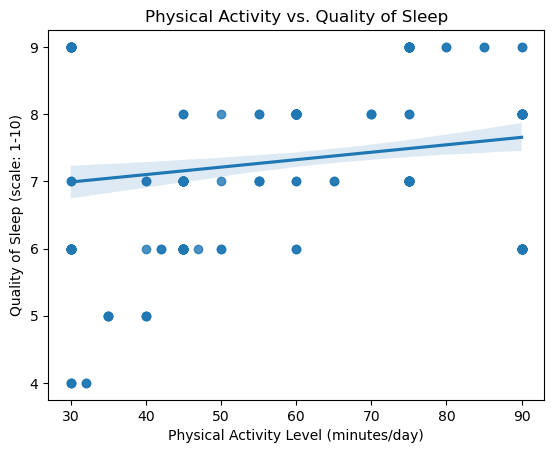

In [24]:
## line plot between physical activity level and quality of sleep
sns.regplot(x='Physical Activity Level', y='Quality of Sleep', data=data2)
plt.title('Physical Activity vs. Quality of Sleep')
plt.xlabel('Physical Activity Level (minutes/day)')
plt.ylabel('Quality of Sleep (scale: 1-10)')
plt.show()

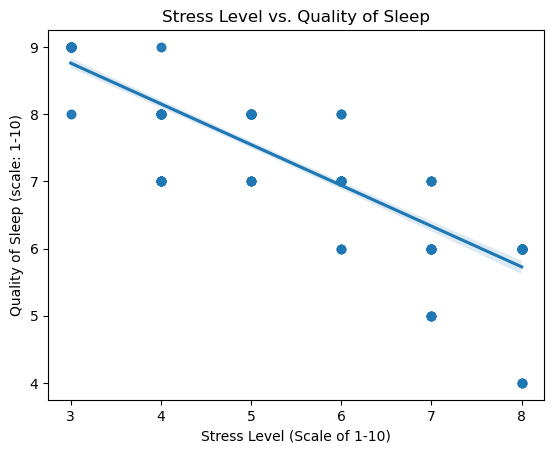

In [25]:
## line plot between stress level and quality of sleep
sns.regplot(x='Stress Level', y='Quality of Sleep', data=data2)
plt.title('Stress Level vs. Quality of Sleep')
plt.xlabel('Stress Level (Scale of 1-10)')
plt.ylabel('Quality of Sleep (scale: 1-10)')
plt.show()

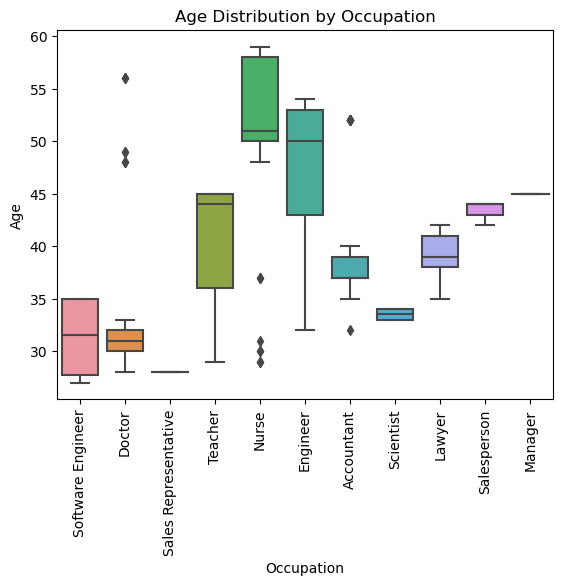

In [26]:
## boxplot of occupation by age
sns.boxplot(x='Occupation', y='Age', data=data2)
plt.title('Age Distribution by Occupation')
plt.xticks(rotation=90)
plt.show()

### MULTIVARIATE PLOTS

C:\Users\johnc\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


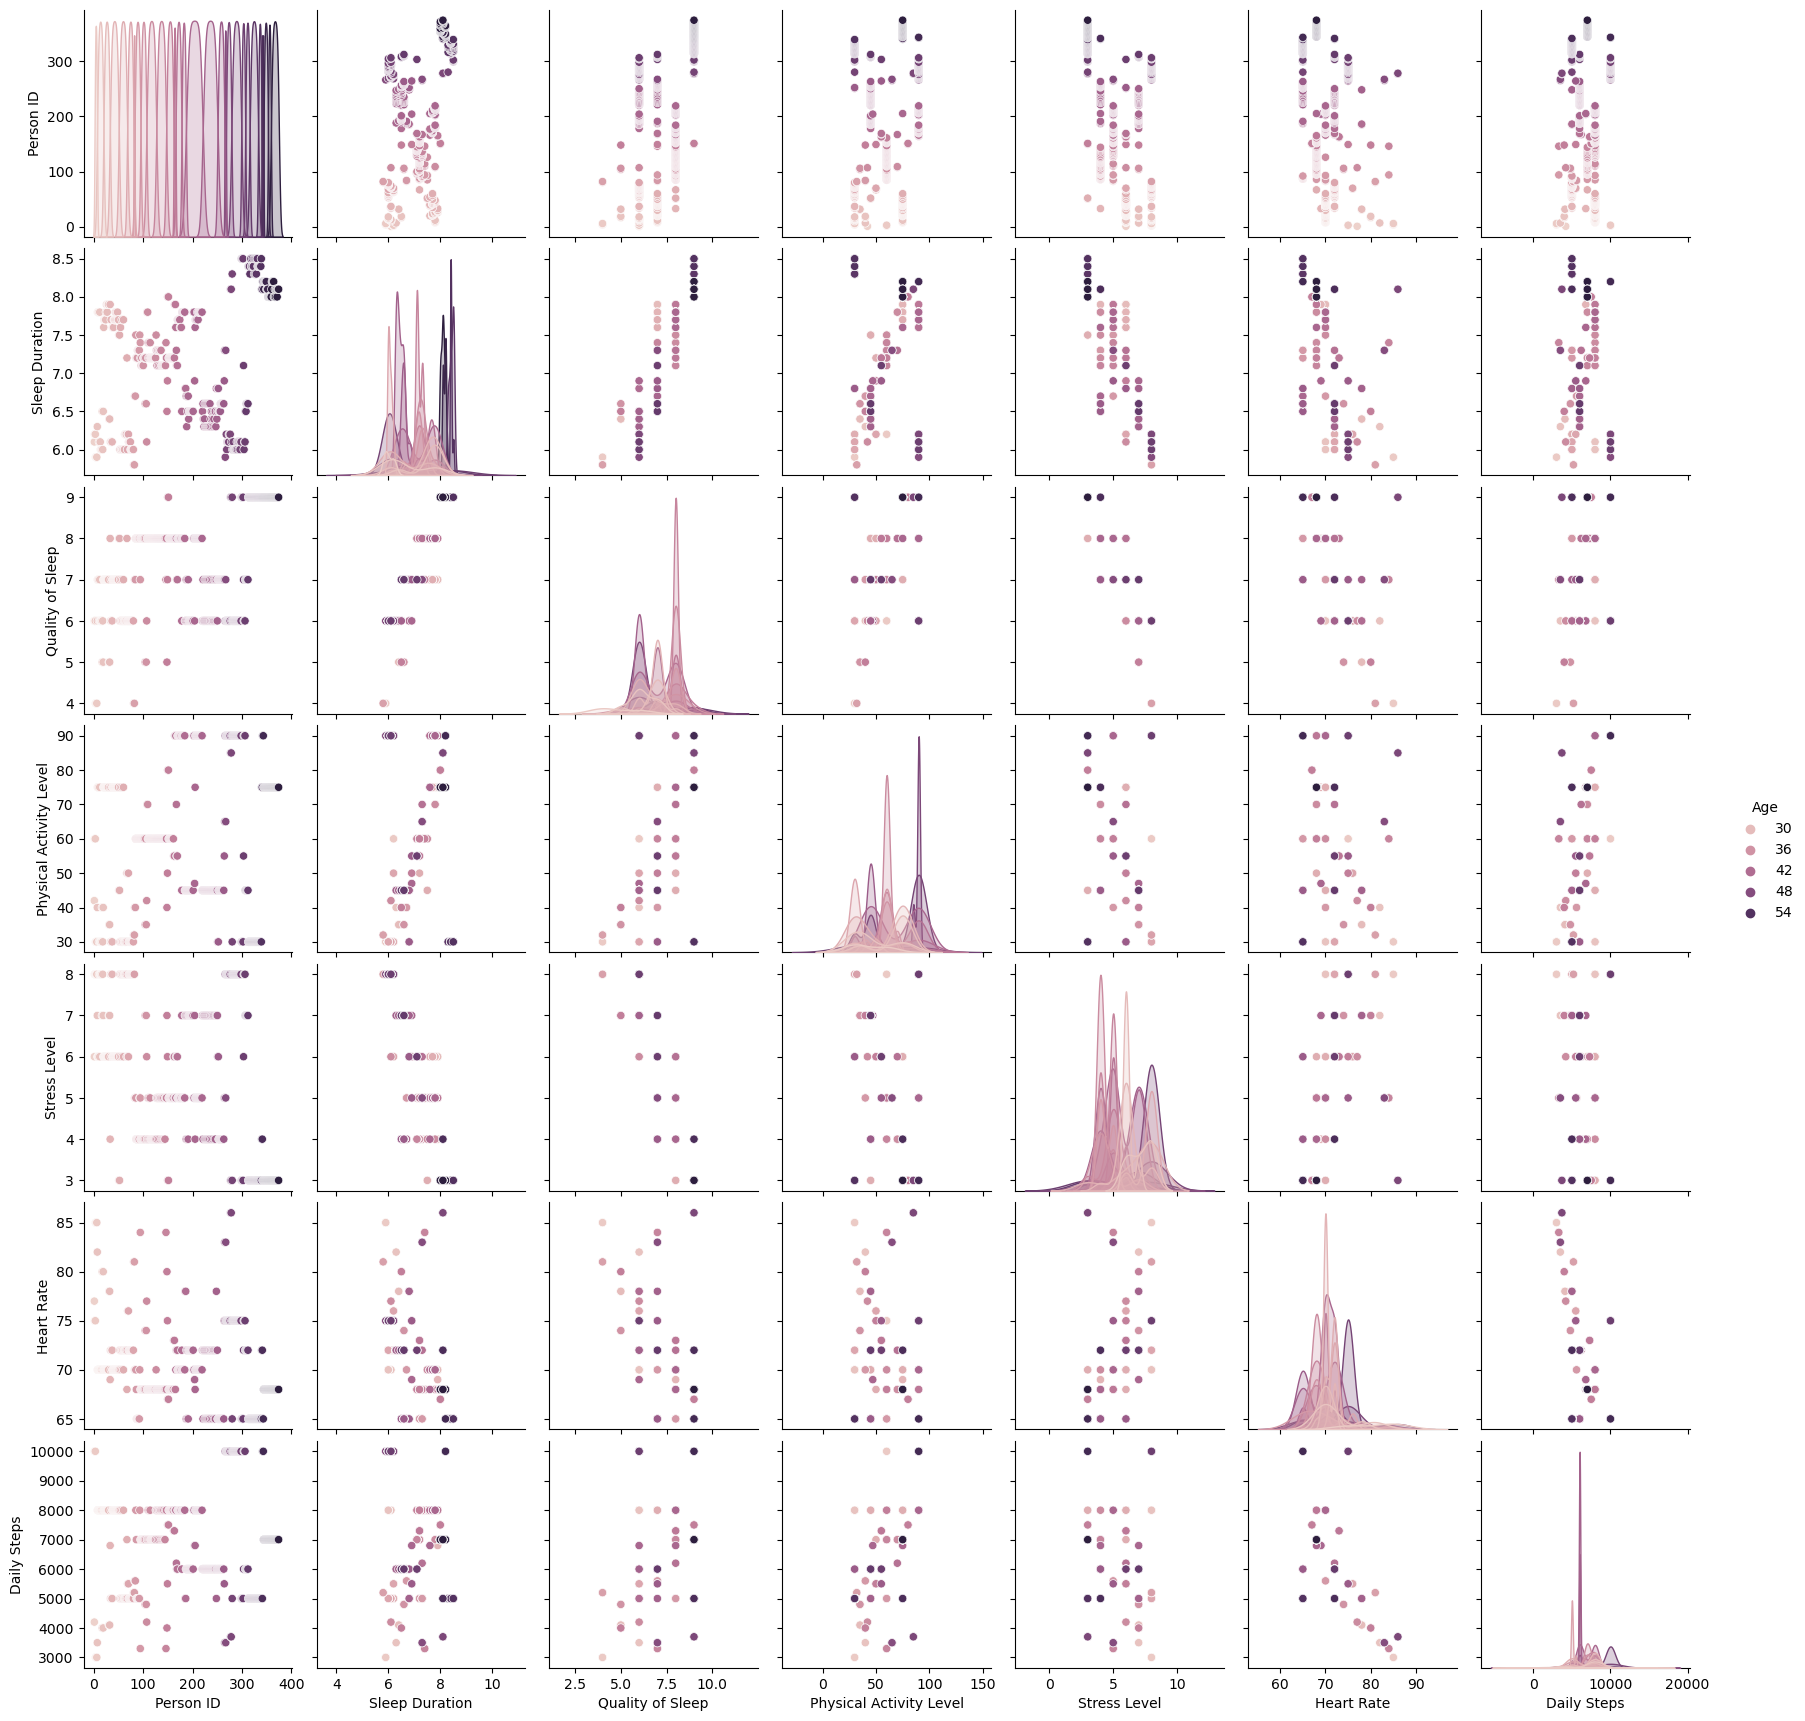

In [27]:
## pairplot to show all numerical relationships, color coded by age
sns.pairplot(data_num,  hue='Age')
plt.show()

### V. Machine Learming Models - Linear Regression Model
Linear Regression is used to predict continuous variables. In our contxt, we will use multiple linear regression to predict Sleep Quality, which is in a scale from 1-10. The independenbt variables will be: Age, Stress Level, Physical Activity Level, Sleep Duration, Daily Steps, Gender, BMI Category, Sleep Disorder.

All the required packages for linear regression have already been installed, therefore, we will now proceed to encoding the dummy variablea which are Gender, BMI Category and Sleep Disorder.

We also mentioned that the BMI Category column has three categories: Normal, Normal Weight, Overweight. Normal and Normal Weight correspond to the same meaning, hence, we replaces "Normal Weight" with "Normal".

In [43]:
data2['BMI Category'] = data['BMI Category'].replace("Normal Weight", "Normal")
data2.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Disorder
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [44]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


#### Step 1 - Identifying Features and the Target Variable

In [45]:
X = data2[['Gender', 'Age', 'Sleep Duration', 'Physical Activity Level', 'Stress Level', 
           'BMI Category', 'Heart Rate', 'Daily Steps', 'Sleep Disorder']]
y = data2['Quality of Sleep']

#### Step 2 - Encoding some of the independent variables in order to perform a regression. We would encode Gender, BMI and Sleep Disorder

In [46]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Sleep Duration           374 non-null    float64
 3   Physical Activity Level  374 non-null    int64  
 4   Stress Level             374 non-null    int64  
 5   BMI Category             374 non-null    object 
 6   Heart Rate               374 non-null    int64  
 7   Daily Steps              374 non-null    int64  
 8   Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(5), object(3)
memory usage: 26.4+ KB


In [47]:
## Use pd.get_dummies to encode all categorical variables
X_encoded=pd.get_dummies(X,columns=['Gender','BMI Category','Sleep Disorder'],drop_first=True)
X_encoded.head()

,Age,Sleep Duration,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Gender_Male,BMI Category_Obese,BMI Category_Overweight,Sleep Disorder_No Disorder,Sleep Disorder_Sleep Apnea
0,27,6.1,42,6,77,4200,True,False,True,True,False
1,28,6.2,60,8,75,10000,True,False,False,True,False
2,28,6.2,60,8,75,10000,True,False,False,True,False
3,28,5.9,30,8,85,3000,True,True,False,False,True
4,28,5.9,30,8,85,3000,True,True,False,False,True


#### Step 4 - Splitting data into Training and Testing sets

In [48]:
X_train,X_test,y_train,y_test=train_test_split(X_encoded,y,test_size=.20,random_state=42)

#### Step 5 - Initializing and Training the model

In [56]:
mlr_model=LinearRegression()
mlr_model.fit(X_train.values,y_train.values)

LinearRegression()

#### Step 6 - Making Predictions on the Test set

In [57]:
y_pred_mlr=mlr_model.predict(X_test)

C:\Users\johnc\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


#### Step 7 -  Evaluating the Model

In [58]:
mse_mlr=mean_squared_error(y_test,y_pred_mlr)
rmse_mlr=np.sqrt(mse_mlr)
r2_mlr=r2_score(y_test,y_pred_mlr)

# Output evaluation metrics
print("Multiple Linear Regression Evaluation Metrics:")
mse_mlr,rmse_mlr,r2_mlr


Multiple Linear Regression Evaluation Metrics:


(0.06544666728290079, 0.25582546253823285, 0.9566182531856803)

R-squared value is a great measurement of the proportion of variance in the target variable explained by the model. The R-squared of this regression is nearly 0.96, which is a high number which indicates that our model is a good fit. 
An MSE of 0.0654 indicates that, on average, the squared difference between the predicted and actual values is relatively small. This suggests that the model is capturing the patterns in the data well, but interpretation depends on the scale of the target variable (Quality of Sleep: 1-10). Lower MSE is better.
An RMSE of 0.256 shows that, on average, the model's predictions deviate from the actual values by about 0.26 units on a scale of 1 to 10. This is a good result if small deviations are acceptable in your application. It indicates decent predictive accuracy for a regression model.

### Example Input:

In [59]:
X_test.sample()

,Age,Sleep Duration,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Gender_Male,BMI Category_Obese,BMI Category_Overweight,Sleep Disorder_No Disorder,Sleep Disorder_Sleep Apnea
346,57,8.2,75,3,68,7000,False,False,True,False,True


Example: To predict the quality of sleep for a male of 28 years old with sleep duration of 6.1, physical activity level of 60, stress level 8, heart rate 72, daily stepd of 4200, with a normal weight and no sleep disorder.

In [60]:
mlr_model.predict([[28,6.1,60,8,72,4200,1,0,0,0,0]])

array([5.42066945])

Our model predicts that with the description from above that the quality of sleep would equal approximately 5.46 out of a 10 point scale.

### VI. Machine Learming Models - Logistic Regression Model
The linear regression machine learning model is better suited for predicting classification outcome - in our example - whether an idnividual experiences sleeping disorder or not. Therefore, the classification problem is binary in our case. 

For simplicity, we first going to prepare the Sleep Disorder column. We will reaplce "Sleep Apnea" and "Insomnia" to just say "Has a Disorder".

In [62]:
data2['Sleep Disorder'] = data2['Sleep Disorder'].replace(
    {'Sleep Apnea': 'Has a Disorder', 'Insomnia': 'Has a Disorder'}
)


print(data2['Sleep Disorder'].head())

0       No Disorder
1       No Disorder
2       No Disorder
3    Has a Disorder
4    Has a Disorder
Name: Sleep Disorder, dtype: object


#### Step 1 - Encoding the Target Variable

In [63]:
data2['Sleep Disorder'] = data2['Sleep Disorder'].map({'Has a Disorder': 1}).fillna(0)

print(data2['Sleep Disorder'].value_counts())


Sleep Disorder
0.0    219
1.0    155
Name: count, dtype: int64


#### Step 2 - Preparing the Features and Target

In [64]:
X = data2[['Gender', 'Age', 'Sleep Duration', 'Physical Activity Level', 
           'Stress Level', 'BMI Category', 'Heart Rate', 'Daily Steps']]
y = data2['Sleep Disorder']

X_encoded = pd.get_dummies(X, columns=['Gender', 'BMI Category'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

#### Step 3 - Training the Logistic Regression Model

In [65]:
log_model = LogisticRegression(max_iter=1000)

# Train the model
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

#### Step 4 - Evaluating the Model

In [66]:
y_pred = log_model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[41  2]
 [ 3 29]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94        43
         1.0       0.94      0.91      0.92        32

    accuracy                           0.93        75
   macro avg       0.93      0.93      0.93        75
weighted avg       0.93      0.93      0.93        75



The logistic regression model demonstrates strong performance in predicting whether an individual has a sleeping disorder or not, achieving an overall accuracy of 92% on the test set. The confusion matrix indicates that the model correctly classified 40 out of 43 instances for the "No Disorder" category (0) and 29 out of 32 instances for the "Has a Disorder" category (1). There were 3 false positives (classified as "Has a Disorder" but actually "No Disorder") and 3 false negatives (classified as "No Disorder" but actually "Has a Disorder").

The classification report highlights high precision and recall for both classes. Precision for "No Disorder" (0) is 93%, meaning the model is very accurate when it predicts "No Disorder." Similarly, precision for "Has a Disorder" (1) is 91%, indicating that most predictions for this class are correct. Recall is 93% for "No Disorder" and 91% for "Has a Disorder," meaning the model successfully identifies the majority of instances for each category. The F1-scores for both classes are above 90%, reflecting a good balance between precision and recall.

In summary, the model performs well with minimal misclassifications, suggesting it is effective for predicting sleep disorders based on the given features. However, attention may be given to further reducing false negatives, as these could represent missed diagnoses.

#### Step 5 - Predicting the Outcome

Example: To predict whether a person has a sleeping disorder or not based on these features: a male of 28 years old with sleep duration of 6.1, physical activity level of 60, stress level 8, heart rate 72, daily stepd of 5500, with a normal weight:

In [67]:
new_data = pd.DataFrame({
    'Age': [28],
    'Sleep Duration': [6.1],
    'Physical Activity Level': [60],
    'Stress Level': [8],
    'Heart Rate': [72],
    'Daily Steps': [5500],
    'Gender_Male': [1],  # 1 for Male
    'BMI Category_Obese': [0],  # 1 if Overweight
    'BMI Category_Overweight': [0]
})

In [68]:
new_data = new_data.reindex(columns=X_encoded.columns, fill_value=0)

# Predict
prediction = log_model.predict(new_data)
print(f"Prediction (1 = Has Disorder, 0 = No Disorder): {prediction[0]}")

Prediction (1 = Has Disorder, 0 = No Disorder): 0.0


Answer: This person has no sleeping disorder.

## Conclusion

In conclusion, the Sleep Health and Lifestyle dataset is extensive and covers a few closely related categories – demographic, sleep, lifestyle, and health information. From the exploratory data analysis portion of this project, we can draw numerous assumptions based on the correlations shown. According to the correlation heatmap, Figure 1, many of the numerical variables have strong correlations, but the strongest relationship appears to be between stress level, duration of sleep, and quality of sleep. This correlation would suggest that the largest factor in how long someone sleeps or how well they sleep is based on their stress levels. This relationship is further proved by Figure 5, which shows a clear trend of lower sleep quality as stress levels increase. Figure 2 is beneficial in helping to understand the proportion of people with sleep disorders. Over 40% of people in this dataset have one of just two specific sleep disorders. Figure 3 suggests that sleeping for a longer time positively affects sleep quality. Figure 4 suggests that while there is a strong difference in sleep quality for people with or without insomnia, people with sleep apnea can have a very wide range of seep quality. Both the linear and logistic regression models for machine learning appeared to work as intended. The predictions are accurate and reliable according to all important metrics. 